<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/KerasDense5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 데이터 가져오기

In [2]:
from google.colab import files
import io
data = files.upload()

Saving result2.csv to result2 (3).csv


In [3]:
df = pd.read_csv('result2.csv')

In [4]:
df

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,0,2021-09-27,21.6,18.7,25.0,0.0,2.4,52,66.0,2.2,21.6,16.1,0.0,63.1
1,1,2021-09-26,22.6,18.4,27.3,0.0,2.3,50,63.0,8.3,23.9,14.6,0.0,70.2
2,2,2021-09-25,21.2,18.7,23.1,0.0,2.3,66,72.6,0.0,21.1,14.3,0.0,70.5
3,3,2021-09-24,21.8,16.7,26.9,0.0,2.2,46,67.5,9.9,23.1,12.1,0.0,70.5
4,4,2021-09-23,20.9,16.9,25.9,0.0,2.4,48,67.3,8.0,22.7,11.9,0.0,63.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1033,2016-05-05,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1034,1034,2016-05-04,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1035,1035,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1036,1036,2016-05-02,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


#### 데이터 랜덤 배치

In [5]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [6]:
train

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
925,925,2016-08-21,30.7,26.9,36.6,0.0,2.1,31,57.5,8.3,33.8,25.6,0.0,33.9
706,706,2017-09-29,17.4,11.2,23.5,0.0,2.2,20,39.3,10.5,20.0,7.3,0.0,52.0
11,11,2021-09-16,22.9,18.0,27.3,0.0,2.6,46,61.1,9.1,26.6,12.6,0.0,79.9
651,651,2018-05-25,19.7,13.8,26.2,0.0,1.8,22,47.4,12.1,23.1,8.2,0.0,10.2
190,190,2020-09-21,19.1,13.6,25.3,0.0,1.7,33,56.1,9.6,20.6,7.3,0.0,61.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,368,2019-09-27,22.9,19.6,27.0,0.0,1.9,35,57.5,3.5,24.4,14.4,0.0,40.7
32,32,2021-08-26,25.5,22.9,27.9,0.7,2.5,75,84.9,0.2,25.9,20.4,1.6,88.3
761,761,2017-08-02,30.0,26.6,33.0,0.0,1.3,55,71.9,3.9,30.4,25.0,0.0,51.9
924,924,2016-08-22,30.7,25.8,36.3,0.4,2.1,37,58.0,11.7,35.0,23.8,8.4,32.9


In [7]:
test

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
799,799,2017-06-25,23.8,21.0,28.4,1.5,1.5,48,75.4,4.6,24.4,19.6,30.5,100.0
222,222,2020-08-20,27.7,25.0,31.7,0.0,1.7,58,76.0,3.1,27.6,21.8,0.0,86.7
225,225,2020-08-17,28.2,26.1,32.2,0.0,2.3,61,77.9,5.8,29.0,22.1,0.0,80.5
731,731,2017-09-03,23.7,19.0,29.2,0.0,1.6,36,64.0,8.5,25.6,16.8,0.0,45.6
821,821,2017-06-03,20.5,16.1,26.5,0.0,3.0,24,44.0,13.5,31.2,12.5,0.0,51.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,174,2020-10-07,16.0,9.9,22.0,0.0,1.9,24,48.9,8.9,14.9,5.8,0.0,39.7
301,301,2020-06-02,17.9,14.8,21.8,2.0,2.2,43,71.0,0.2,18.3,9.9,2.0,61.4
272,272,2020-07-01,21.1,18.1,24.3,0.0,1.9,67,79.3,0.2,21.3,15.8,0.0,71.2
847,847,2017-05-08,17.9,11.1,23.5,0.0,2.1,34,43.6,6.1,21.7,5.8,0.0,20.8


In [8]:
train_data_set = train.values
X_train = train_data_set[:, 2:-1].astype(float)
Y_train = train_data_set[:, -1].astype(float)

In [10]:
test_data_set = test.values
X_test = test_data_set[:, 2:-1].astype(float)
Y_test = test_data_set[:, -1].astype(float)

### 모델 구성

In [11]:
model = Sequential()
model.add(Dense(64, input_dim = 11, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dense(300,activation='relu'))
#model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [16]:
model.compile(loss='mse', optimizer='adam',metrics=['mae','mse'])

### 모델 학습

In [17]:
hist=model.fit(X_train, Y_train, epochs=10000, batch_size=32)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
26/26 [==============================] - 0s 5ms/step - loss: 0.3857 - mae: 0.4326 - mse: 0.3857
Epoch 7502/10000
26/26 [==============================] - 0s 5ms/step - loss: 0.3350 - mae: 0.4270 - mse: 0.3350
Epoch 7503/10000
26/26 [==============================] - 0s 5ms/step - loss: 0.3258 - mae: 0.4303 - mse: 0.3258
Epoch 7504/10000
26/26 [==============================] - 0s 6ms/step - loss: 0.2717 - mae: 0.3907 - mse: 0.2717
Epoch 7505/10000
26/26 [==============================] - 0s 4ms/step - loss: 0.2284 - mae: 0.3672 - mse: 0.2284
Epoch 7506/10000
26/26 [==============================] - 0s 4ms/step - loss: 0.1783 - mae: 0.3223 - mse: 0.1783
Epoch 7507/10000
26/26 [==============================] - 0s 5ms/step - loss: 0.1501 - mae: 0.3008 - mse: 0.1501
Epoch 7508/10000
26/26 [==============================] - 0s 5ms/step - loss: 0.1542 - mae: 0.3017 - mse: 0.1542
Epoch 7509/10000
26/26 [==============================] - 0s 4ms/step - loss:

In [22]:
import matplotlib.pyplot as plt

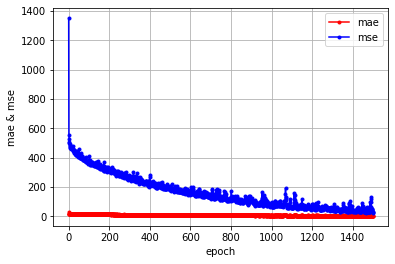

In [26]:
y_acc = hist.history['mae']
y_loss = hist.history['mse']
#x_len = np.arange(len(y_loss)) 
x_len = np.arange(1500)
plt.plot(x_len, y_acc[:1500], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:1500], marker='.', c='blue', label="mse")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae & mse')
plt.show()

### 학습과정 살펴보기



In [20]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])
print(hist.history['mse'])

## training loss and acc ##
[1350.262939453125, 553.908935546875, 525.3394165039062, 505.161865234375, 503.4066162109375, 483.9341125488281, 493.36749267578125, 480.4190368652344, 474.1658935546875, 469.1478271484375, 464.9757385253906, 471.07421875, 468.06121826171875, 459.15191650390625, 467.2561340332031, 465.61431884765625, 468.7960205078125, 463.21875, 462.3970031738281, 477.6213073730469, 459.7351379394531, 462.6946105957031, 443.7440490722656, 449.3100280761719, 452.77313232421875, 439.038330078125, 453.4796447753906, 446.3348693847656, 434.41693115234375, 429.1624755859375, 423.7248229980469, 432.9759826660156, 435.8447570800781, 429.4031677246094, 425.8638916015625, 442.7029724121094, 421.03472900390625, 415.7781982421875, 415.22552490234375, 429.0302429199219, 448.013916015625, 440.37860107421875, 419.0483703613281, 438.4459228515625, 424.3279724121094, 430.32763671875, 417.1824951171875, 411.0300598144531, 407.6247863769531, 408.3416442871094, 459.3477478027344, 425.04360961

### 모델 평가하기

In [21]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 2ms/step - loss: 136.9996 - mae: 6.7243 - mse: 136.9996
## evaluation loss and_metrics ##
[136.99960327148438, 6.724292278289795, 136.99960327148438]


# 모델 사용하기


In [ ]:
# 이건 아직 불확실해요!!
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)